In [ ]:
# Cài đặt thư viện cho Selenium để chạy trên trình duyệt Chrome và google Colab 
!pip install selenium
!apt-get update # để cập nhật ubuntu cho việc chạy để tải apt
!apt install chromium-chromedriver

from selenium import webdriver # sử dụng selenium webdriver để cho phép chạy các câu lệnh kiểm tra trực tiếp bằng trình duyệt web
#điều chỉnh lại 1 số options để chạy được trên google colab 
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC

import time
import sys
from bs4 import BeautifulSoup
import pandas as pd 
import requests 
import re
import numpy as np 
#import 1 số thư viện dùng để vẽ biểu đồ 
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import matplotlib as mpl


In [ ]:
# Nhận URL 
url ='http://s.cafef.vn/hastc/MVB/thong-tin-tai-chinh.chn'
page = requests.get(url)

# Tạo 3 mảng 
a = [] # doanh thu
b = [] # lợi nhuận sau thuế
Name = [] # tên đề mục 

# Sử dụng soup để lấy dữ liệu 
soup = BeautifulSoup(page.text, 'html.parser')
#print(soup)

In [ ]:
# Lấy dữ liệu của doanh thu
rows = soup.find_all('tr', attrs={'id':'ctl00_ContentPlaceHolder1_CompanyInfo_FinanceStatement1_rptNhomChiTieu_ctl00_rptData_ctl00_TrData'})
#print(rows)
for i in rows:
  row = i.find_all('td')
  Name.append(row[0].text.strip())
  a.append(row[1].text.strip())
  a.append(row[2].text.strip())
  a.append(row[3].text.strip())
  a.append(row[4].text.strip())
# Lấy dữ liệu lợi nhuận sau thuế
row1 = soup.find_all('tr', attrs={'id':'ctl00_ContentPlaceHolder1_CompanyInfo_FinanceStatement1_rptNhomChiTieu_ctl00_rptData_ctl06_TrData'})
#print(row1)
for i in row1:
  rows1 = i.find_all('td')
  Name.append(rows1[0].text.strip())
  b.append(rows1[1].text.strip())
  b.append(rows1[2].text.strip())
  b.append(rows1[3].text.strip())
  b.append(rows1[4].text.strip())

In [ ]:
# Dùng selenium webdriver để lấy các quý trong năm 
driver.get('https://s.cafef.vn/hastc/MVB-tong-cong-ty-cong-nghiep-mo-viet-bac-tkv-ctcp.chn')
wait = WebDriverWait(driver,20)
years=[]
year1 = driver.find_element_by_xpath('/html[1]/body[1]/form[1]/div[3]/div[2]/div[1]/div[2]/div[2]/div[1]/div[1]/div[9]/div[2]/div[1]/div[1]/div[2]/table[1]/tbody[1]/tr[1]/th[2]').text
year2 = driver.find_element_by_xpath('/html[1]/body[1]/form[1]/div[3]/div[2]/div[1]/div[2]/div[2]/div[1]/div[1]/div[9]/div[2]/div[1]/div[1]/div[2]/table[1]/tbody[1]/tr[1]/th[3]').text
year3 = driver.find_element_by_xpath('/html[1]/body[1]/form[1]/div[3]/div[2]/div[1]/div[2]/div[2]/div[1]/div[1]/div[9]/div[2]/div[1]/div[1]/div[2]/table[1]/tbody[1]/tr[1]/th[4]').text
year4 = driver.find_element_by_xpath('/html[1]/body[1]/form[1]/div[3]/div[2]/div[1]/div[2]/div[2]/div[1]/div[1]/div[9]/div[2]/div[1]/div[1]/div[2]/table[1]/tbody[1]/tr[1]/th[5]').text
years.append(year1)
years.append(year2)
years.append(year3)
years.append(year4)
time.sleep(3)
driver.quit()

In [ ]:
# In ra kiểm tra 
print("Doanh thu: ", a)
print("Lợi nhuận sau thuế: ", b)
print("Đề mục: ", Name)
print("Quý: ", years)

Doanh thu:  ['1,010,855,691', '1,524,129,235', '1,144,554,071', '1,365,981,909']
Lợi nhuận sau thuế:  ['19,909,725', '184,875,068', '84,957,679', '126,113,870']
Đề mục:  ['Doanh thu bán hàng và CCDV', 'Lợi nhuận sau thuế']
Quý:  ['Quý 3-2020', 'Quý 4-2020', 'Quý 1-2021', 'Quý 2-2021']


In [ ]:
# Tạo dataframe cho dữ liệu 
data1 = pd.DataFrame(a, index = years, columns=['Doanh thu'])
data2 = pd.DataFrame(b, index = years, columns=['Lợi nhuận sau thuế'])

bigdata = pd.concat([data1,data2], axis = 1)
#print(bigdata)

bigdata["Doanh thu"] = bigdata['Doanh thu'].str.replace(',', '').astype(float)
bigdata["Lợi nhuận sau thuế"] = bigdata['Lợi nhuận sau thuế'].str.replace(',', '').astype(float)

# for row in bigdata.itertuples():
#     print(row)

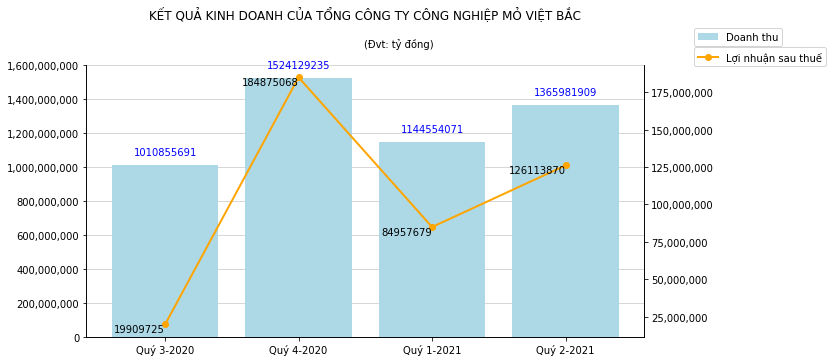

In [ ]:
# Vẽ biểu đồ 
fig = plt.figure(figsize = (10, 5))
ax1 = plt.subplot(1,1,1)

line1 = ax1.bar(bigdata.index,bigdata['Doanh thu'], color="lightblue",label="Doanh thu" ) #

ax1.yaxis.grid(linestyle ='-', linewidth=0.5)
ax1.set_axisbelow(True)

ax2=ax1.twinx()
line2 = ax2.plot(bigdata.index, bigdata['Lợi nhuận sau thuế'], 'o-' ,color="orange",linewidth=2.0,label="Lợi nhuận sau thuế") #

ax1.spines['top'].set_linewidth(0)
ax2.spines['top'].set_linewidth(0)

# set subtitle 
tfrom = ax1.get_xaxis_transform()
ann = ax1.annotate('(Đvt: tỷ đồng)',xy=(1.75, 1.08), xycoords= tfrom, bbox=dict(boxstyle='square,pad=0.5', fc='white', ec='none'),ha='center', va='center',fontsize = 10)

plt.title('KẾT QUẢ KINH DOANH CỦA TỔNG CÔNG TY CÔNG NGHIỆP MỎ VIỆT BẮC',fontsize = 12,y=1.15)
# hiện chú thích
ax1.legend(loc='lower left', bbox_to_anchor=(1.08, 1.05),
          ncol=3, fancybox=True)
ax2.legend(loc='lower left', bbox_to_anchor=(1.08, 0.977),
          ncol=3, fancybox=True)
# hiện giá trị 2 bên cột 
ax1.yaxis.set_major_formatter(
        tkr.FuncFormatter(lambda y,  p: format(int(y), ',')))
ax2.yaxis.set_major_formatter(
        tkr.FuncFormatter(lambda y,  p: format(int(y), ',')))

#Hiện giá trị ở các cột bar và line
indx1 = np.arange(len(bigdata['Doanh thu']))
for i in indx1: 
  ax1.annotate('{0:.0f}'.format(line1[i].get_height()),
               xy = (line1[i].get_x() + line1[i].get_width()/2, line1[i].get_height()),
              xytext =(0,8), color = "blue",
               textcoords = 'offset points',
               ha = 'center', va ='bottom') 
arr = bigdata['Lợi nhuận sau thuế'].to_numpy()
for i, v in enumerate(arr):
    ax2.text(i, v+25, "%d" %v, ha="right", va="top", )

plt.show()